In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analysis and Visualization of BFS-AMCC Output

Analysis of the BFS-AMCC model output when the beam-size is set to 5 for the anchor model. This notebook provides visualizations based on the model's output for this specific configuration. Changing the beam-size or model parameters may lead to different results.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
import matplotlib.colors as mcolors


#Load data and create results directory

In [5]:
data_path = "path to your output file from bfs-amcc algorithm"

data = pd.read_csv(data_path)
results_dir = "results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)


#Quick examination and cleanup

In [6]:
# Displaying the top 5 time values
top_5_times = data.nlargest(5, 'time')['time']
print(top_5_times)

# Displaying mean time based on success status
mean_time = data.groupby('success')['time'].mean()
print(mean_time)

# Dropping rows corresponding to the two highest times
top_indices = data.nlargest(2, 'time').index
data.drop(top_indices, inplace=True)


36    2.595671
11    1.364780
77    0.752756
70    0.638583
41    0.561997
Name: time, dtype: float64
success
0    0.208311
1    0.066265
Name: time, dtype: float64


#Visualization of success and failure distribution:

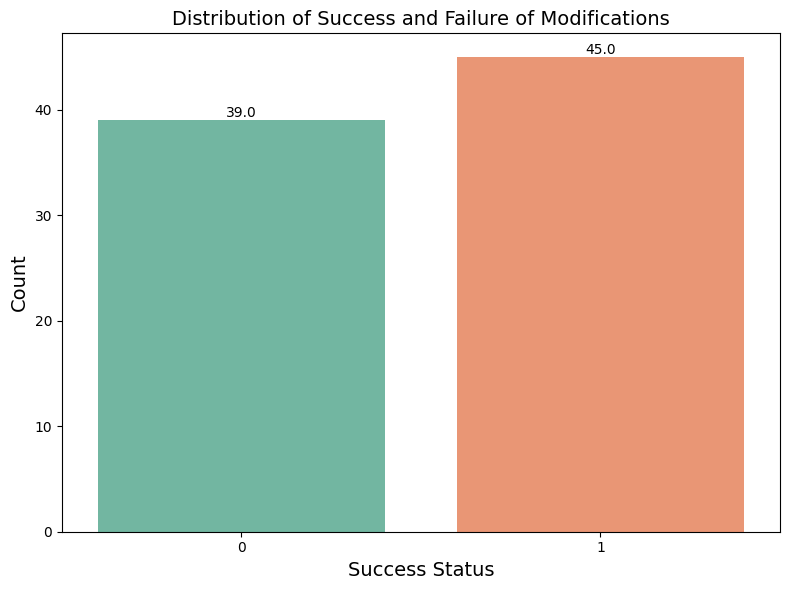

In [8]:
plt.figure(figsize=(8, 6), dpi=100)
ax = sns.countplot(x='success', data=data, palette="Set2")
plt.title('Distribution of Success and Failure of Modifications', fontsize=14)
plt.xlabel('Success Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "success_distribution.png"))
plt.show()


# Histogram for time distribution:

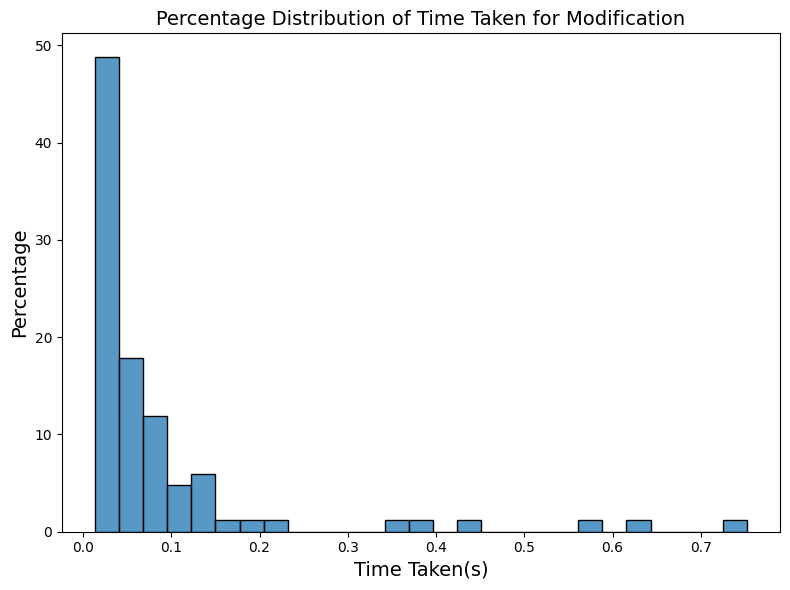

In [9]:
plt.figure(figsize=(8, 6), dpi=100)
sns.histplot(data['time'], bins='auto', kde=False, fill=True, stat='percent')
plt.title('Percentage Distribution of Time Taken for Modification', fontsize=14)
plt.xlabel('Time Taken(s)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "time_distribution.png"))
plt.show()


#  Boxplot comparing successful vs. unsuccessful modifications:

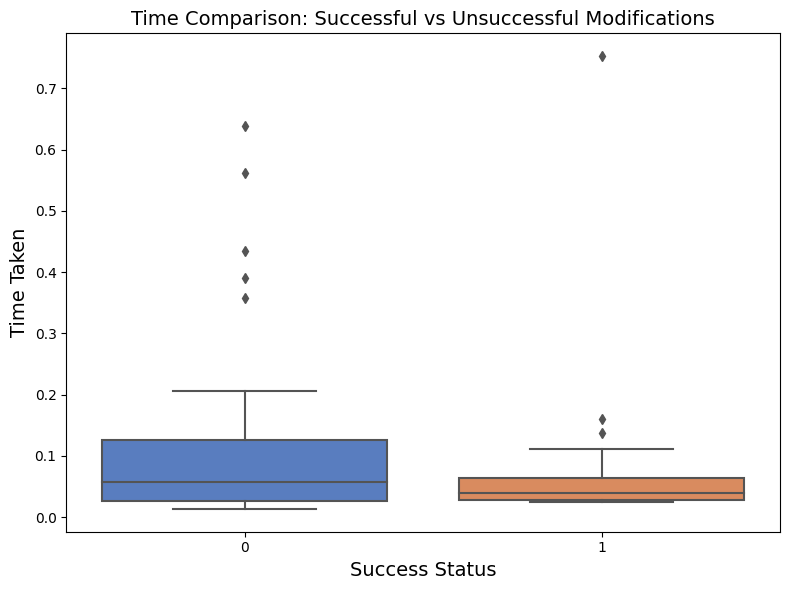

In [11]:
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(x='success', y='time', data=data, palette="muted")
plt.title('Time Comparison: Successful vs Unsuccessful Modifications', fontsize=14)
plt.xlabel('Success Status', fontsize=14)
plt.ylabel('Time Taken', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "time_box_plot.png"))
plt.show()


# Preprocessing for modification's time plot:

In [12]:
df = data[['changes', 'time']]
df = df.dropna(subset=['changes'])
df['changes'] = df['changes'].apply(ast.literal_eval)
df['change_string'] = df['changes'].apply(lambda x: ', '.join([f'{k}: {v[0]} → {v[1]}' for k, v in x.items()]))
df = df.drop_duplicates(subset='change_string')


# Bar plot for each modification's time:

<ipython-input-14-7449f4e64b4a>:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))


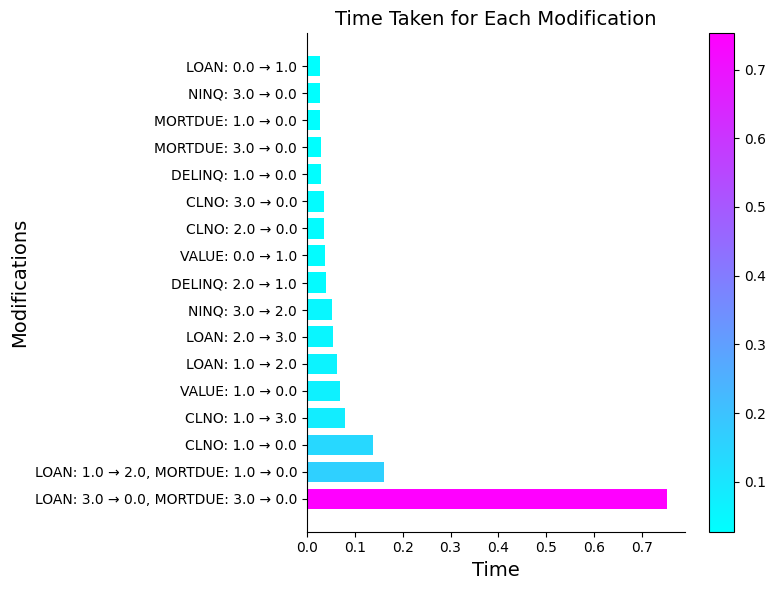

In [14]:
df = df.sort_values(by='time', ascending=True)
cmap = plt.get_cmap("cool")
norm = mcolors.Normalize(vmin=df['time'].min(), vmax=df['time'].max())
plt.figure(figsize=(8, 6), dpi=100)
bars = plt.barh(df['change_string'], df['time'], color=cmap(norm(df['time'].values)), height=0.75)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.title('Time Taken for Each Modification', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Modifications', fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "modification_times.png"))
plt.show()
